#  **Introdução**


Este projeto tem como objetivo a construção e implementação de um modelo de machine learning para previsão de dados, utilizando o algoritmo Random Forest Regressor. O modelo é treinado a partir de um conjunto de dados contendo variáveis relevantes para a predição, garantindo um processo robusto de aprendizado e análise.

O fluxo do projeto abrange todas as etapas essenciais para a criação de um modelo preditivo *eficiente*, incluindo:


Avaliação do desempenho: São utilizadas métricas como **Erro Absoluto Médio (MAE)** e **Erro Quadrático Médio (MSE)** para validar a precisão do modelo.
Salvamento do modelo: O modelo treinado é armazenado para possibilitar previsões futuras com novos dados.

#  **Etapas do Projeto**

1.   Coleta e preparação dos dados: Os dados são obtidos de um repositório online e passam por um processo de limpeza e normalização para garantir sua qualidade.
2.   Divisão entre treino e teste: O conjunto de dados é separado para permitir a avaliação do desempenho do modelo.
3. Treinamento do modelo: O Random Forest Regressor é treinado para aprender padrões e relações entre as variáveis preditoras e o alvo.
4. Avaliação do desempenho: São utilizadas métricas como Erro Absoluto Médio (MAE) e Erro Quadrático Médio (MSE) para validar a precisão do modelo.
5. Salvamento do modelo: O modelo treinado é armazenado para possibilitar previsões futuras com novos dados.


# Notebook de Machine Learning - Previsão com Random Forest

## Passo 1: Configurações Iniciais

### Importar Bibliotecas
Importamos as bibliotecas necessárias para manipulação de dados, visualização e Machine Learning.

In [ ]:
# Bibliotecas Padrão do Python
import requests

# Bibliotecas para Manipulação de Dados
import pandas as pd
import numpy as np

# Bibliotecas para Visualização
import matplotlib.pyplot as plt
import seaborn as sns

# Bibliotecas para Machine Learning
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error

# Biblioteca para Salvamento do Modelo
import joblib

### Configurar exibição do pandas

In [41]:
pd.options.display.max_columns = None
pd.options.display.float_format = "{:,.6f}".format

## Passo 2: Coletar os Dados
Faz o download de um arquivo CSV de um repositório do GitHub e o lê como um DataFrame do Pandas.


### Download do arquivo .csv

<p>Faz o download do arquivo direto do repositório</p>

In [ ]:
%%capture
!wget "https://raw.githubusercontent.com/maiagia/modelo_b3/main/arquivos/massadados_comtarget.csv"

### Carregar dados no DataFrame

In [ ]:
# Lê o arquivo CSV baixado e armazena os dados em um DataFrame
vBase = pd.read_csv("massadados_comtarget.csv")

## Passo 3: Explorar os Dados
Visualizamos a estrutura e estatísticas básicas dos dados.

### Visualizar base

In [ ]:
vBase.head(4)

### Informações

In [ ]:
vBase.info()

### Estatística Descritiva

In [ ]:
vBase.describe().T

### Pairplot

In [ ]:
%matplotlib inline
sns.pairplot(vBase)
plt.show()

## Passo 4: Pré-processamento

### Normalização dos dados

In [42]:
vBase_PreProcessada = vBase.copy()

vBase_PreProcessada[['QTD_TEORICA', 'QTD_TEORICA_TOTAL', 'QTD_REDUTOR', 'VAL_PARTICIPACAO_ACUMULADA_SETOR']] = StandardScaler().fit_transform(vBase_PreProcessada[['QTD_TEORICA', 'QTD_TEORICA_TOTAL', 'QTD_REDUTOR', 'VAL_PARTICIPACAO_ACUMULADA_SETOR']])

vBase_PreProcessada.head(3)

,QTD_TEORICA,QTD_TEORICA_TOTAL,QTD_REDUTOR,VAL_PARTICIPACAO_ACUMULADA_SETOR,VAL_PARTICIPACAO_SETOR
0,0.084637,0.000000,0.000000,-0.497047,2.979000
1,-0.301313,0.000000,0.000000,-0.485554,2.802000
2,-0.353112,0.000000,0.000000,-0.485554,0.249000


## Passo 5: Separar as Variáveis para Treinamento
Realiza o pré-processamento dos dados, incluindo a seleção de features, normalização e divisão entre conjunto de treino e teste para um modelo de machine learning.

### Separar features e target

In [ ]:
vFeatures = vBase[['QTD_TEORICA', 'QTD_TEORICA_TOTAL', 'QTD_REDUTOR', 'VAL_PARTICIPACAO_ACUMULADA_SETOR']]
vTarget = vBase['VAL_PARTICIPACAO_SETOR']

### Separar features e target de treino e teste

In [44]:
# Divisão dos dados em treino (80%) e teste (20%)
vFeatures_Treino, vFeatures_Teste, vTarget_Treino, vTarget_Teste = train_test_split(vFeatures, vTarget, test_size=0.2, random_state=42)

# Exibe o tamanho dos conjuntos gerados
print(f"Tamanho do treino: {vFeatures_Treino.shape}\nTamanho do teste: {vFeatures_Teste.shape}")


Tamanho do treino: (278, 4)
Tamanho do teste: (70, 4)


## Passo 6: Treinar o Modelo
Cria, treina e ajusta um modelo de regressão usando RandomForestRegressor, um algoritmo de aprendizado de máquina baseado em múltiplas árvores de decisão.

In [47]:
# Criação do modelo RandomForestRegressor
vModelo_RandomForestRegressor = RandomForestRegressor(n_estimators=100, random_state=42)

# Treinamento do modelo com os dados de treino
vModelo_RandomForestRegressor.fit(vFeatures_Treino, vTarget_Treino)

RandomForestRegressor(random_state=42)

## Passo 7: Avaliar o Modelo
Avalia o desempenho do modelo treinado, gerando previsões sobre os dados de teste e calculando métricas de erro para medir sua precisão.

### Predição com a base de teste

In [48]:
vPredicao = vModelo_RandomForestRegressor.predict(vFeatures_Teste)

### Calcular métricas

In [49]:
vMetrica_MAE = mean_absolute_error(vTarget_Teste, vPredicao) # Erro absoluto médio
vMetrica_MSE = mean_squared_error(vTarget_Teste, vPredicao) # Erro quadrático médio
vMetrica_RMSE = np.sqrt(vMetrica_MSE) # Raiz do erro quadrático médio

print(f"MAE: {vMetrica_MAE}")
print(f"MSE: {vMetrica_MSE}")
print(f"RMSE: {vMetrica_RMSE}")

MAE: 0.041729142857143034
MSE: 0.010124553925714397
RMSE: 0.10062084240213057


### Previsões geradas (Exibindo as 10 primeiras)

In [53]:
vPredicao[:10]


array([ 0.60524,  0.23706,  0.35478,  0.79442,  0.55072,  3.9818 ,
        0.10512, 11.20416,  0.07109,  1.1549 ])

## Passo 8: Salvar o Modelo
Salva o modelo treinado em um arquivo para que possa ser reutilizado posteriormente sem necessidade de um novo treinamento.

In [54]:
%%capture
joblib.dump(vModelo_RandomForestRegressor, "modelo_b3.pkl")

['modelo_b3.pkl']

## Passo 9: Fazer uma Previsão
Cria um conjunto de novos dados e usa o modelo treinado para fazer previsões sobre eles.

### Download de um novo arquivo

In [ ]:
%%capture
!wget "https://raw.githubusercontent.com/maiagia/modelo_b3/main/arquivos/massadedados_semtarget.csv"

### Carregar dados em um DataFrame

In [62]:
vBase_NovoArquivo = pd.read_csv("massadedados_semtarget.csv")

### Pré-processar dados

In [68]:
vBase_NovoArquivo_PreProcessada = vBase_NovoArquivo.copy()
vBase_NovoArquivo_PreProcessada[['QTD_TEORICA', 'QTD_TEORICA_TOTAL', 'QTD_REDUTOR','VAL_PARTICIPACAO_ACUMULADA_SETOR']] = StandardScaler().fit_transform(vBase_NovoArquivo_PreProcessada[['QTD_TEORICA', 'QTD_TEORICA_TOTAL', 'QTD_REDUTOR','VAL_PARTICIPACAO_ACUMULADA_SETOR']])

vBase_NovoArquivo_PreProcessada.head(3)

,QTD_TEORICA,QTD_TEORICA_TOTAL,QTD_REDUTOR,VAL_PARTICIPACAO_ACUMULADA_SETOR
0,0.084637,0.000000,0.000000,-0.497047
1,-0.301313,0.000000,0.000000,-0.485554
2,-0.353112,0.000000,0.000000,-0.485554


### Carregar modelo

In [69]:
vModelo = joblib.load("modelo_b3.pkl")

### Fazer previsões

In [70]:
vBase_NovoArquivo_PreProcessada['PREVISAO'] = vModelo.predict(vBase_NovoArquivo_PreProcessada)

vBase_NovoArquivo_PreProcessada.head(3)

,QTD_TEORICA,QTD_TEORICA_TOTAL,QTD_REDUTOR,VAL_PARTICIPACAO_ACUMULADA_SETOR,PREVISAO
0,0.084637,0.000000,0.000000,-0.497047,0.098010
1,-0.301313,0.000000,0.000000,-0.485554,0.098010
2,-0.353112,0.000000,0.000000,-0.485554,0.098010


## Passo 10: Dashboard

### Valores previstos vs. QTD_TEORICA

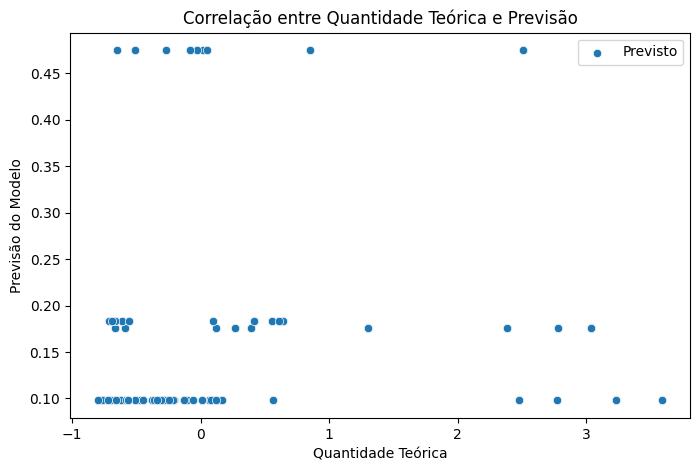

In [73]:
plt.figure(figsize=(8, 5))
sns.scatterplot(x=vBase_NovoArquivo_PreProcessada['QTD_TEORICA'], y=vBase_NovoArquivo_PreProcessada['PREVISAO'], marker="o", label="Previsto")
plt.xlabel("Quantidade Teórica")
plt.ylabel("Previsão do Modelo")
plt.title("Correlação entre Quantidade Teórica e Previsão")
plt.legend()
plt.show()

### Evolução das Previsões

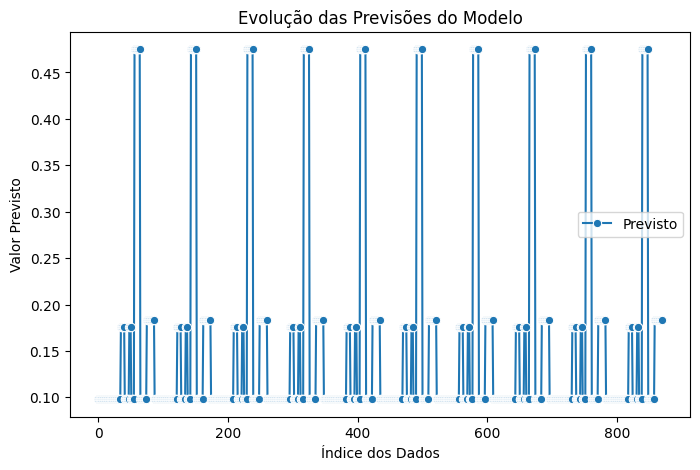

In [76]:
plt.figure(figsize=(8, 5))
sns.lineplot(x=vBase_NovoArquivo_PreProcessada.index, y=vBase_NovoArquivo_PreProcessada['PREVISAO'], marker="o", label="Previsto")
plt.xlabel("Índice dos Dados")
plt.ylabel("Valor Previsto")
plt.title("Evolução das Previsões do Modelo")
plt.legend()
plt.show()

# **Conclusão sobre o Modelo**

O modelo apresenta um **bom desempenho considerando a natureza dos dados**, que possuem uma distribuição com valores relativamente próximos.

Os **resultados das métricas de erro são baixos**, com um **MAE de 0.0417**, indicando que, em média, as previsões estão muito próximas dos valores reais. Além disso, o **MSE de 0.0101 e RMSE de 0.1006** demonstram que o modelo tem uma boa capacidade de aprendizado sobre os padrões dos dados.

A análise gráfica mostra que o modelo conseguiu capturar **tendências recorrentes** dentro do conjunto analisado, com previsões estáveis e coerentes com a estrutura da base. Isso reforça sua **consistência e confiabilidade para cenários com características semelhantes.**